In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Define paths to the directories
train_dir = 'C:\\Users\\Rajabi\\Desktop\\NASA\\RSSCN7-master\\New\\train'
validation_dir = 'C:\\Users\\Rajabi\\Desktop\\NASA\\RSSCN7-master\\New\\validation'
test_dir = 'C:\\Users\\Rajabi\\Desktop\\NASA\\RSSCN7-master\\New\\test'

In [3]:
# Define image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Specify the batch size and target image size
batch_size = 32
target_size = (400, 400)

In [5]:
# Create generators for training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 1960 images belonging to 7 classes.


In [6]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 420 images belonging to 7 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 420 images belonging to 7 classes.


In [8]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 128)      0

In [10]:
# Train the model
epochs = 20

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/20
62/62 [==============================] - 602s 10s/step - loss: 2.2312 - accuracy: 0.2730 - val_loss: 1.6215 - val_accuracy: 0.3167
Epoch 2/20
62/62 [==============================] - 636s 10s/step - loss: 1.1292 - accuracy: 0.5597 - val_loss: 1.3402 - val_accuracy: 0.3929
Epoch 3/20
62/62 [==============================] - 616s 10s/step - loss: 0.8701 - accuracy: 0.6449 - val_loss: 0.9798 - val_accuracy: 0.5333
Epoch 4/20
62/62 [==============================] - 614s 10s/step - loss: 0.6247 - accuracy: 0.7668 - val_loss: 1.1764 - val_accuracy: 0.5619
Epoch 5/20
62/62 [==============================] - 615s 10s/step - loss: 0.4569 - accuracy: 0.8383 - val_loss: 1.2395 - val_accuracy: 0.5619
Epoch 6/20
62/62 [==============================] - 619s 10s/step - loss: 0.2774 - accuracy: 0.8964 - val_loss: 1.1374 - val_accuracy: 0.6071
Epoch 7/20
62/62 [==============================] - 608s 10s/step - loss: 0.2093 - accuracy: 0.9194 - val_loss: 1.7417 - val_accuracy: 0.5667
Epoch 

In [11]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

14/14 [==============================] - 31s 2s/step - loss: 3.4257 - accuracy: 0.5452
Test Accuracy: 0.5452380776405334


In [12]:
# Confusion Matrix
test_predictions = model.predict(test_generator)
test_predictions = np.argmax(test_predictions, axis=1)

14/14 [==============================] - 31s 2s/step


In [13]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [14]:
conf_matrix = confusion_matrix(true_classes, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 9  5  1  9 15 10 11]
 [16  3  5 11 10  7  8]
 [15  4  8 12  9  5  7]
 [12  4  7 10 16  6  5]
 [10  4  2  9 13 11 11]
 [11  2  9  9 11 10  8]
 [16  4 12  3 10  8  7]]


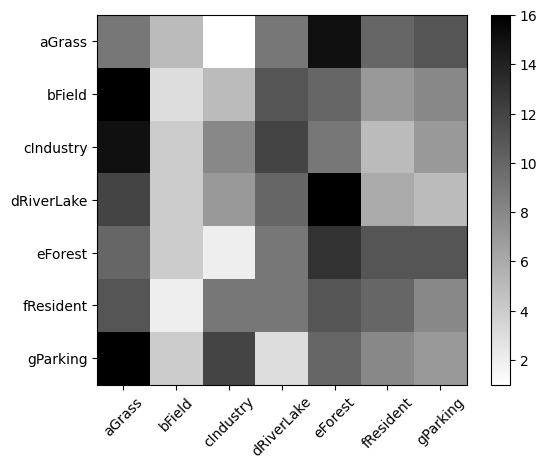

In [15]:
plt.imshow(conf_matrix, cmap='binary')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels)
plt.colorbar()
plt.show()

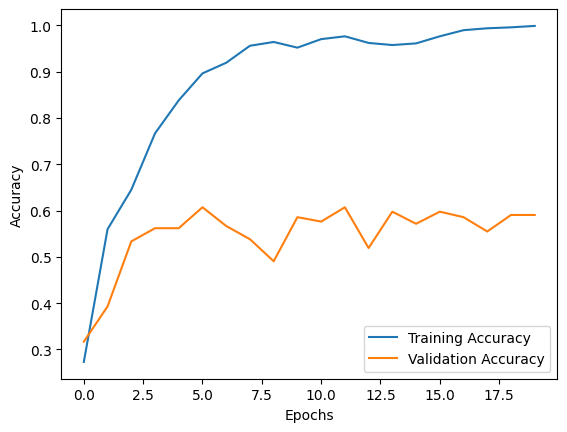

In [16]:
# Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()